# Introducing Geomeppy

By adding the Geomeppy library into BESOS, we can now modify the building with some simple functions.
Some of the following examples are from [Geomeppy documentation](https://geomeppy.readthedocs.io/en/latest/index.html).

In [1]:
from besos import eppy_funcs as ef
import geomeppy

First we will get the building, and show a representation of the IDF.

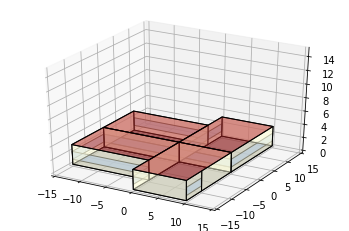

In [2]:
building = ef.get_building('t-shaped.exp.idf')
building.view_model()

Now you can modify geomeppy.idf with geomeppy functions. First we’ll set window to wall ratio. By default, the set_wwr() will set WWR to 20%, you can also pass the spcific value by set_wwr(0.2)

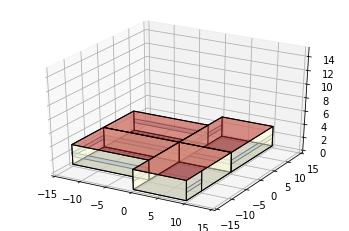

In [3]:
#The result will be the same
building.set_wwr()
building.set_wwr(0.2)
building.view_model()

We can also set WWR for sepcific orientation. 

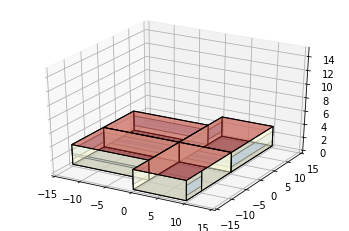

In [4]:
"""Set WWR to 10% on all external walls with azimuth of 90, and 50% on other walls"""
building.set_wwr(wwr = 0.5, wwr_map={180: 0.1})
building.view_model()

We can output a .obj file in order to view the model in other software or website, such as [3D viewer](https://3dviewer.net/).

In [5]:
building.to_obj('building.obj')

In the following example, we create a function to scale the zone and all the windows in that zone.

In [6]:
def scaling(building, zone_dict):
    for i, zone in enumerate(zone_dict):
        for surface in building.getsurfaces():
            if surface["Zone_Name"] == zone:
                geomeppy.recipes.scale([surface], zone_dict[zone][1], zone_dict[zone][0])
                scaling_windows(building, surface, zone_dict[zone][1], zone_dict[zone][0])

def scaling_windows(building, surface, factor, axes):
    windows = [
        w
        for w in building.idfobjects["FENESTRATIONSURFACE:DETAILED"]
        if w.Surface_Type.upper() == "WINDOW" and w.Building_Surface_Name == surface.Name
    ]
    if not windows:
        return
    for window in windows:
        v1 = (window.Vertex_1_Xcoordinate,
             window.Vertex_1_Ycoordinate,
             window.Vertex_1_Zcoordinate,)
        v2 = (window.Vertex_2_Xcoordinate,
             window.Vertex_2_Ycoordinate,
             window.Vertex_2_Zcoordinate,)
        v3 = (window.Vertex_3_Xcoordinate,
             window.Vertex_3_Ycoordinate,
             window.Vertex_3_Zcoordinate,)
        v4 = (window.Vertex_4_Xcoordinate,
             window.Vertex_4_Ycoordinate,
             window.Vertex_4_Zcoordinate,)
        ploy = geomeppy.recipes.scale_coords([v1, v2, v3, v4], factor, axes)
        window.Vertex_1_Xcoordinate = ploy[0][0]
        window.Vertex_1_Ycoordinate = ploy[0][1]
        window.Vertex_1_Zcoordinate = ploy[0][2]
        window.Vertex_2_Xcoordinate = ploy[1][0]
        window.Vertex_2_Ycoordinate = ploy[1][1]
        window.Vertex_2_Zcoordinate = ploy[1][2]
        window.Vertex_3_Xcoordinate = ploy[2][0]
        window.Vertex_3_Ycoordinate = ploy[2][1]
        window.Vertex_3_Zcoordinate = ploy[2][2]
        window.Vertex_4_Xcoordinate = ploy[3][0]
        window.Vertex_4_Ycoordinate = ploy[3][1]
        window.Vertex_4_Zcoordinate = ploy[3][2]

Now we scale Thermal Zone 1 with 1.5 on x axis, and Thermal Zone 3 with 0.5 on y axis.

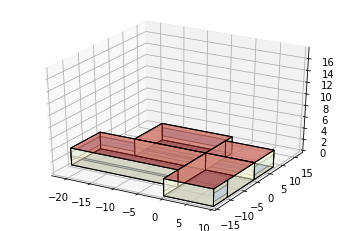

In [7]:
zone_dict = {
    'Thermal Zone 1': ("x", 1.5),
    'Thermal Zone 3': ("y", 0.5)
}
    
scaling(building, zone_dict)
building.view_model()

Save the modified idf

In [8]:
building.saveas("modified.idf")